In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler, PowerTransformer

#import sqlalchemy as sa
#from sqlalchemy.orm import sessionmaker
#import getpass  # To get the password without showing the input


In [53]:
#password = getpass.getpass()

In [54]:
#open csv file
#excel_engine = "openpyxl"
#df = pd.read_excel(r".\data\raw\creditcardmarketing.xlsx", engine=excel_engine)
customer_df=pd.read_csv(r".\files_for_lab\customer_value_analysis.csv")
display(customer_df)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [55]:
#renaming columns, removing "#", padding and replacing spaces with "_"
# Convert all column names to lowercase
customer_df.columns = customer_df.columns.str.lower()

# Remove '#' symbols from column names
customer_df.columns = customer_df.columns.str.replace('#', '')

# Remove leading and trailing spaces from column names
customer_df.columns = customer_df.columns.str.strip()

# Replace spaces with underscores in column names
customer_df.columns = customer_df.columns.str.replace(' ', '_')

# Optionally, you can also remove spaces in the data itself (for string columns)
customer_df = customer_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [56]:
# Calculate the percentage of NaN values in each column
nan_percentage = (customer_df.isna().sum() / len(customer_df)) * 100

# Display the percentage of NaN values for each column
display(nan_percentage)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [57]:
#drop empty and duplicate customers
customer_df.drop_duplicates(subset="customer", keep="first", inplace=True)

#df.dropna(subset=["customer"], inplace=True)

# Reset the DataFrame index after dropping rows
customer_df.reset_index(drop=True, inplace=True)
customer_df.shape

(9134, 24)

In [58]:
#5 Change the type of effective_to_date column to DateTime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# Verify the data type conversion
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

C:\Users\i.glavatskyi\AppData\Local\Temp\ipykernel_28072\3977136369.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [59]:
#6 check NaNs per column
nan_counts = customer_df.isna().sum()
nan_counts

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [60]:
#7 Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

def separate_numerical_categorical(df):
    # Initialize empty DataFrames for numerical and categorical columns
    numerical_cols = pd.DataFrame()
    categorical_cols = pd.DataFrame()

    # Loop through columns in the input DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # If the column is numeric, add it to the numerical DataFrame
            numerical_cols[column] = df[column]
        else:
            # If the column is not numeric, add it to the categorical DataFrame
            categorical_cols[column] = df[column]

    return numerical_cols, categorical_cols

In [61]:
#8 DropID & separate
customer_df = customer_df.drop('customer', axis=1)

In [62]:
#7 separate

numerical_df, categorical_df = separate_numerical_categorical(customer_df)
print(numerical_df.info(), categorical_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   state              9

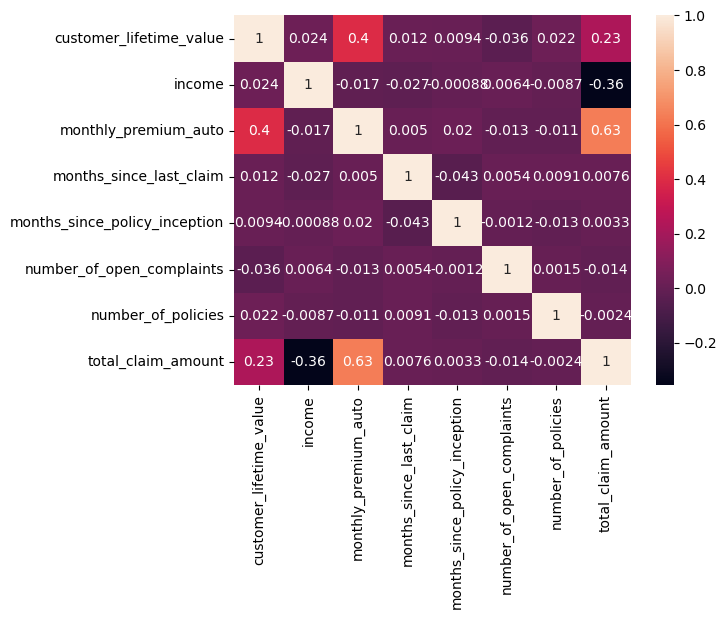

In [63]:
#9 Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation?
correlation_matrix = numerical_df.corr()

# Find the pair of numerical variables with the highest correlation
max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).idxmax()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

#print("\nPair of Numerical Variables with Highest Correlation:")
#print(max_corr_pair)

In [64]:
#10


def separate_continuous_discrete(df, threshold=36):
    """
    Separate numerical columns into continuous and discrete based on the number of unique values.

    Parameters:
        df (pd.DataFrame): Input DataFrame.
        threshold (int): Threshold to discriminate between continuous and discrete columns. Default is 36.

    Returns:
        pd.DataFrame: DataFrame containing continuous numerical columns.
        pd.DataFrame: DataFrame containing discrete numerical columns.
    """
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()

    for column in df.columns:
        unique_count = df[column].nunique()
        if unique_count > threshold:
            continuous_df[column] = df[column]
        else:
            discrete_df[column] = df[column]

    return continuous_df, discrete_df


# continuous_df, discrete_df = separate_continuous_discrete(input_df)



In [65]:
continuous_df, discrete_df = separate_continuous_discrete(customer_df)
# print(continuous_df, discrete_df)

In [69]:
#11 Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

import matplotlib.pyplot as plt

def create_barplots(df, figsize=(16, 16)):
    """
    Create bar plots for all columns in the input DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame with discrete columns.
        figsize (tuple): Figure size (width, height). Default is (16, 16).

    Returns:
        None
    """
    num_columns = len(df.columns)
    num_cols_per_row = 4  # Number of columns to display per row

    # Calculate the number of rows needed for subplots
    num_rows = (num_columns + num_cols_per_row - 1) // num_cols_per_row

    plt.figure(figsize=figsize)

    plots = []
    for i, column in enumerate(df.columns):
        plt.subplot(num_rows, num_cols_per_row, i + 1)
        plot = sns.countplot(data=df, x=column)
        plots.append(plot)
        plt.title(column)
        plt.xticks(rotation=90)
    
    plt.tight_layout()
    return plots

# Example usage:
# bar_plots=create_barplots(discrete_df)


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

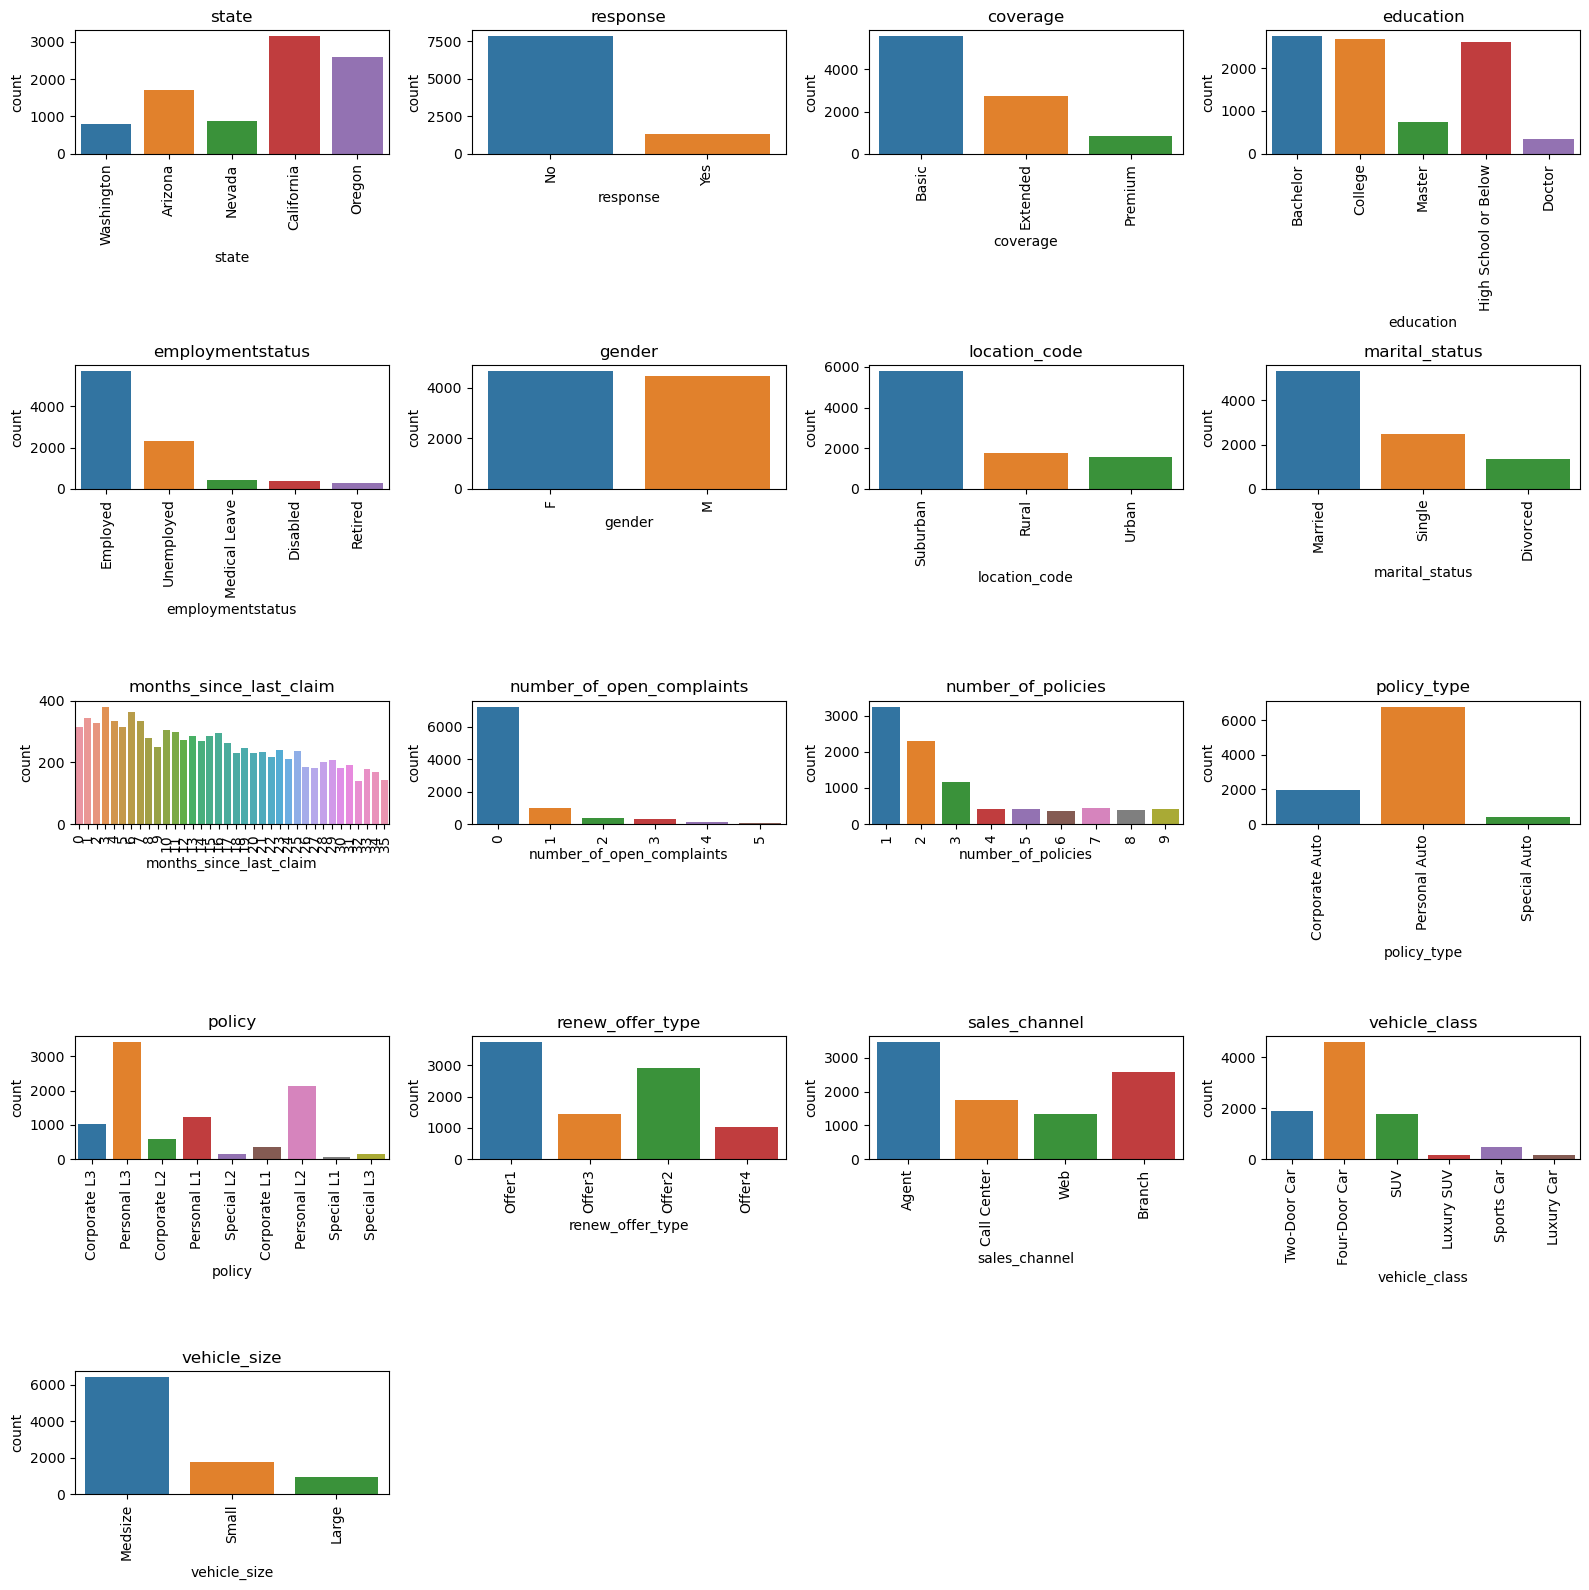

In [70]:
bar_plots=create_barplots(discrete_df)

In [71]:
#12 Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

def plot_histograms(continuous_df):
    # Set the figure size
    plt.figure(figsize=(16, 16))

    # Get the list of column names
    columns = continuous_df.columns

    # Calculate the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols - 1) // 3 + 1

    # Create subplots for each column
    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 3, i)
        sns.histplot(continuous_df[column], kde=True)
        plt.title(column)
        plt.xlabel("")

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
# plot_histograms(continuous_df)


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

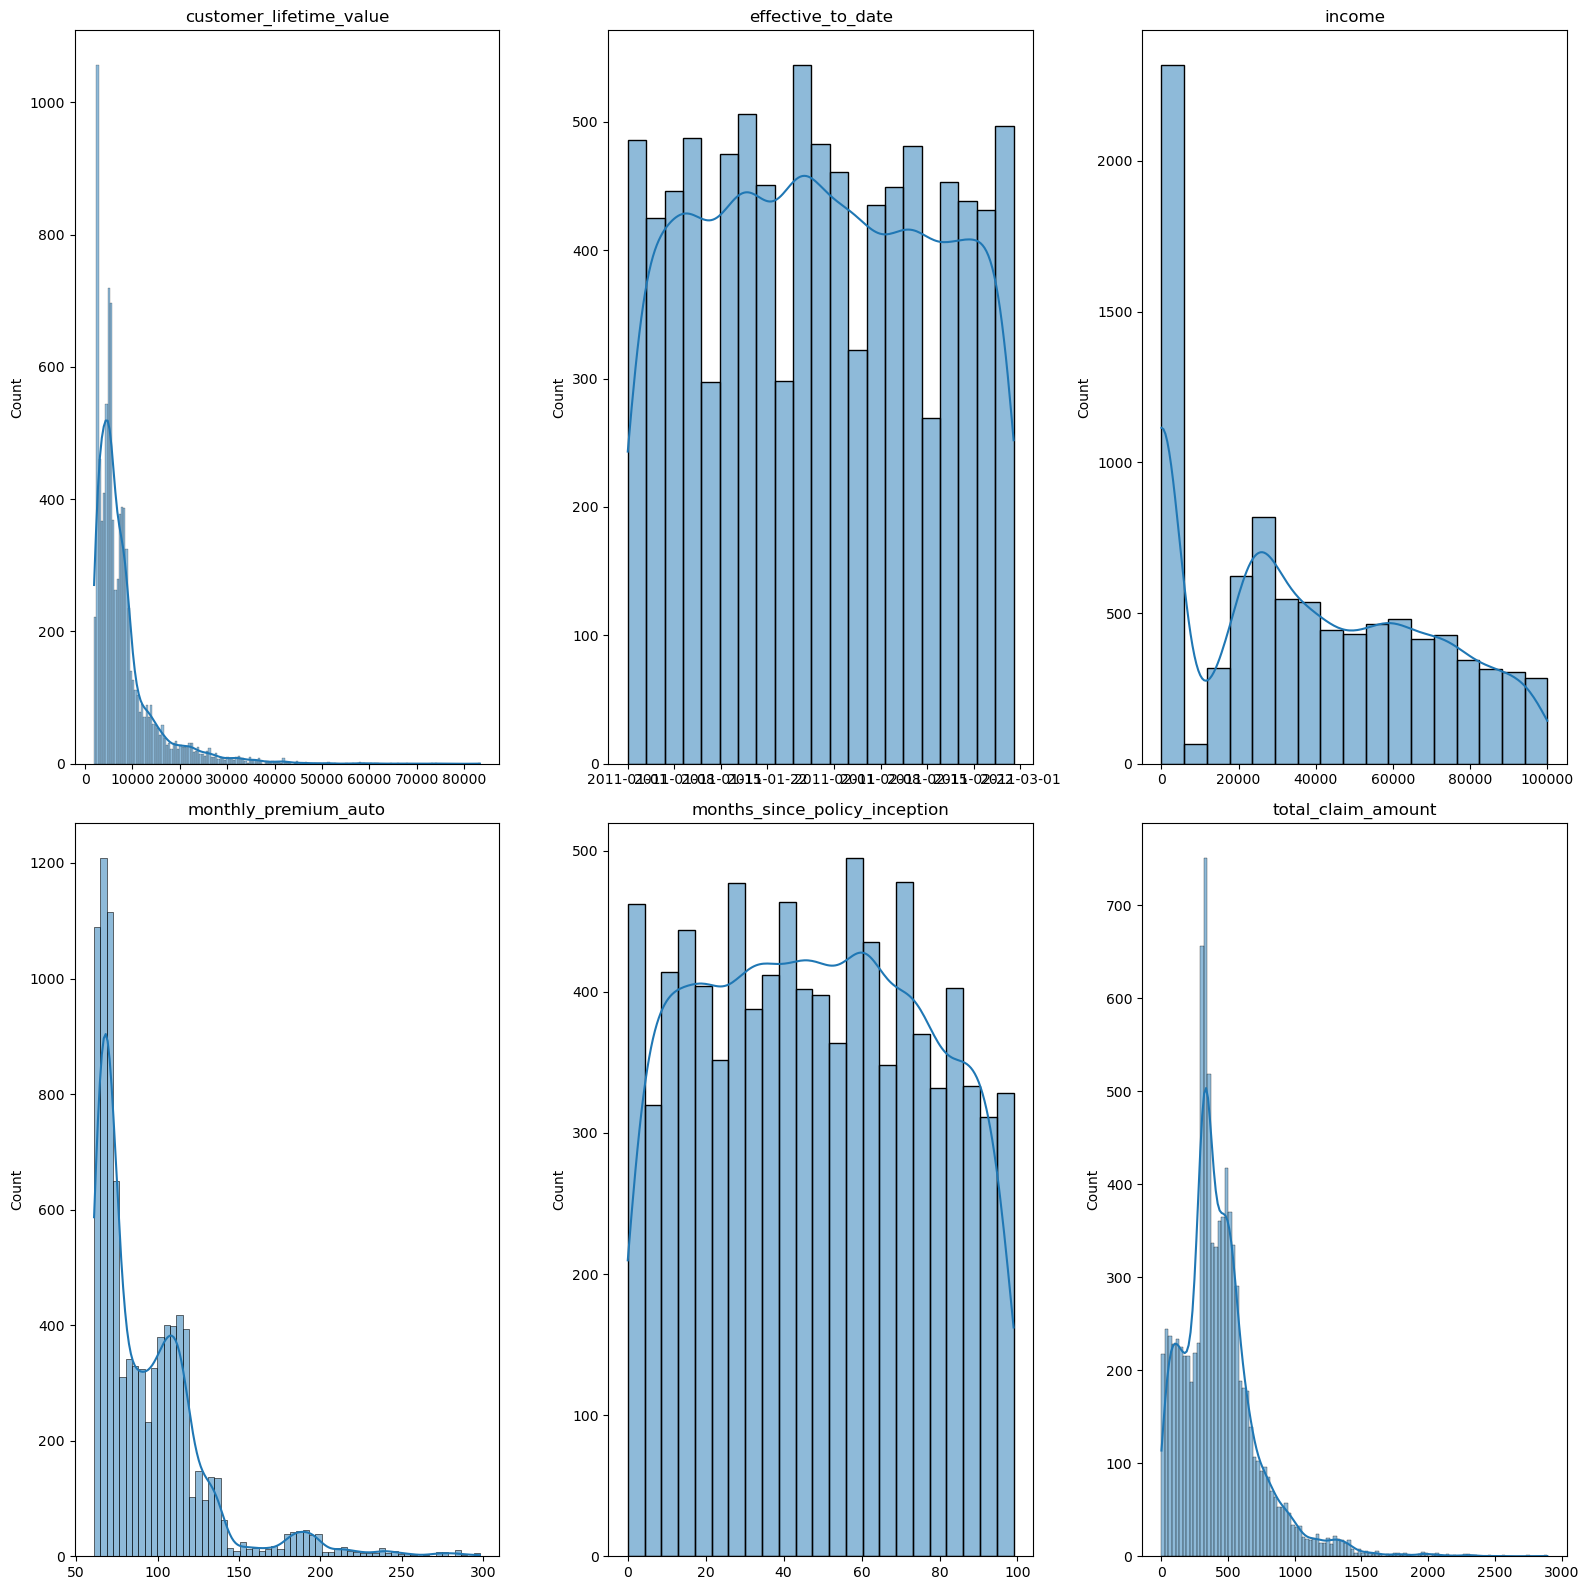

In [72]:
plot_histograms(continuous_df)

In [84]:
#13 Calc skewness & create box plots

from scipy.stats import skew

def box_plots_and_skewness(df, columns):
    # Calculate the number of rows and columns for subplots
    num_cols = len(columns)
    num_rows = (num_cols - 1) // 2 + 1

    # Create subplots for each column
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    fig.suptitle("Box Plots and Skewness for Selected Columns")

    # Initialize a dictionary to store skewness values
    skewness_dict = {}

    # Calculate box plots and skewness for selected columns
    for i, column in enumerate(columns):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        
        # Create box plot
        sns.boxplot(data=df, x=column, ax=ax)
        ax.set_title(f"Box Plot for '{column}'")
        ax.set_xticklabels([])  # Remove x-axis labels
        
        # Calculate skewness
        try:
            skew_value = skew(df[column])
            skewness_dict[column] = skew_value
        except Exception as e:
            skewness_dict[column] = None

        # Display skewness values
        ax.text(0.05, 0.9, f"Skewness: {skewness_dict[column]:.2f}", transform=ax.transAxes)
        
    # Adjust the layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    # Show the plots
    plt.show()

    return skewness_dict


C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

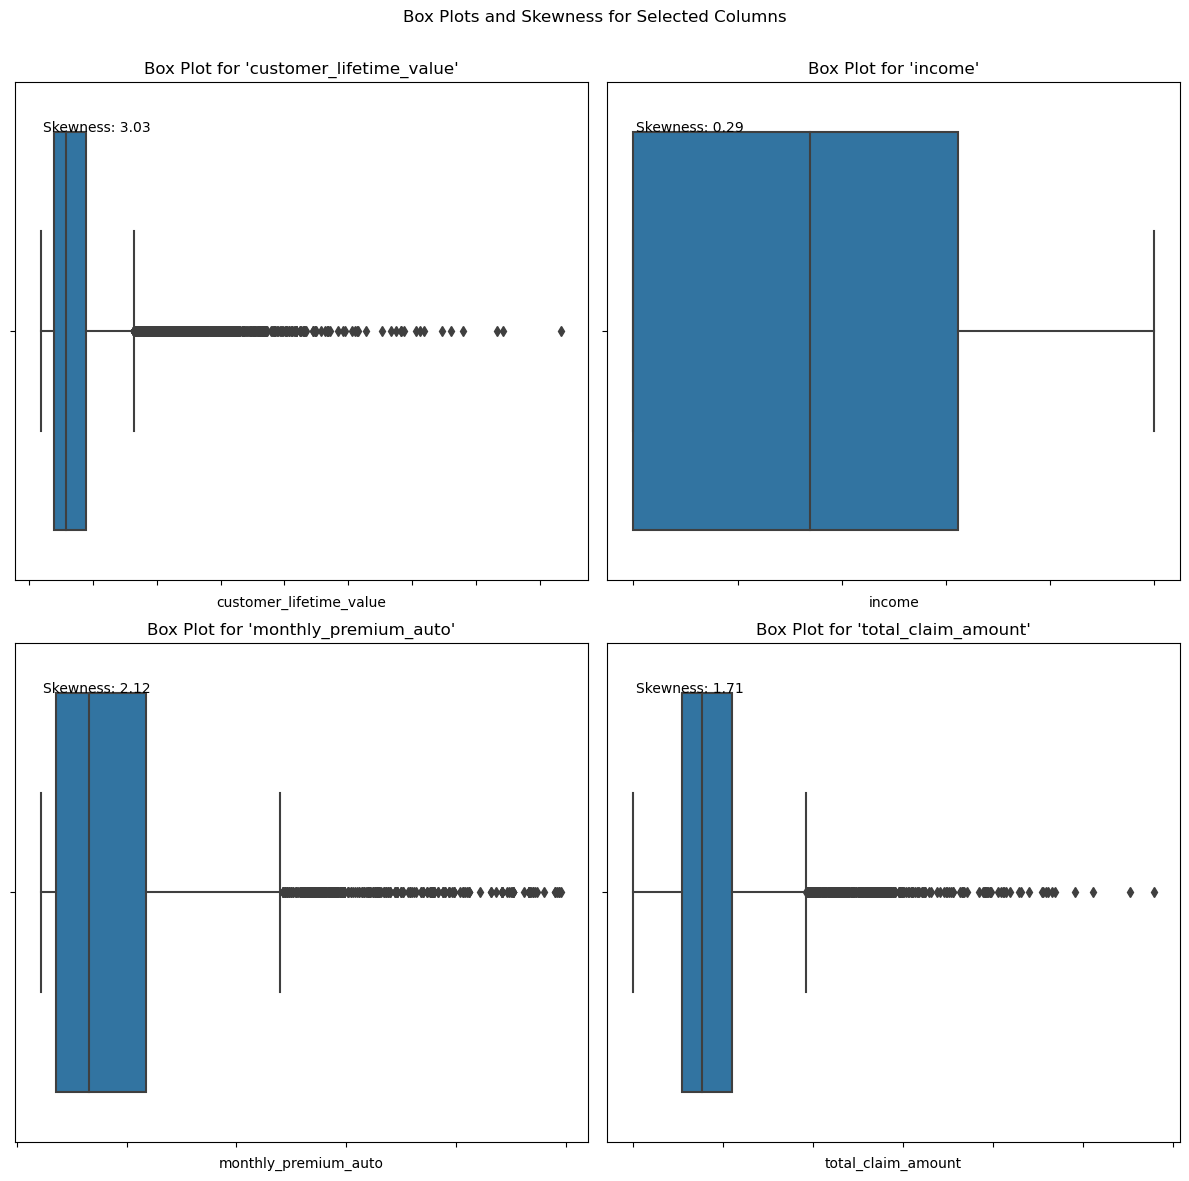

In [85]:
selected_columns = ['customer_lifetime_value',
       'monthly_premium_auto', 'total_claim_amount']
skewness = box_plots_and_skewness(continuous_df, selected_columns)

In [86]:
def get_skewed_columns(df: pd.DataFrame) -> list:
    '''
    This function will consider the numerical columns of a Pandas DataFrame and it will display a tuple of (Boolean, Skew)
    for every column. In addition, it will return a list of the column_names that have an skewness > < 2

    Input:
    df: Pandas DataFrame

    Output:
    list
    '''

    df2 = df.copy()

    my_list = [ ( column, ( df2[column].skew() > 2) or (df2[column].skew() < -2), df2[column].skew().round(1) ) for column in df2.select_dtypes(np.number).columns]

    for element in my_list:
        print(element)

    return [element[0] for element in my_list if element[1]==True]

In [87]:
skewed_columns = get_skewed_columns(continuous_df)
skewed_columns

('customer_lifetime_value', True, 3.0)
('income', False, 0.3)
('monthly_premium_auto', True, 2.1)
('months_since_policy_inception', False, 0.0)
('total_claim_amount', False, 1.7)


['customer_lifetime_value', 'monthly_premium_auto']

In [93]:
def detect_outliers_iqr(df: pd.DataFrame, columns: list) ->list:
    '''
    This function checks a column of a given Pandas DataFrame, computes the IRQ,
    the lower, and upper wiskers and flags the value as "outlier" if the value is outside the
    lower or upper wisker

    Input:
    df: Pandas DataFrame

    Output:
    Python list of indexes for values which are outliers.
    '''
    outliers = []

    for column in columns:
        df2 = df.copy()

        iqr = df2[column].quantile(0.75) - df2[column].quantile(0.25)

        lower_wisker = df2[column].quantile(0.25) - ( 1.5 * iqr)
        upper_wisker = df2[column].quantile(0.75) + ( 1.5 * iqr)

        column_outliers = df2[ (df2[column] < lower_wisker) | (df2[column] > upper_wisker) ].index.tolist()
        outliers.append({column: column_outliers})

    return outliers

In [94]:
outliers_iqr = detect_outliers_iqr(continuous_df, skewed_columns)
print("Outliers from Z-scores method: ", outliers_iqr)

Outliers from Z-scores method:  [{'customer_lifetime_value': [8, 22, 31, 50, 51, 63, 70, 79, 95, 114, 125, 168, 169, 181, 198, 232, 247, 251, 260, 262, 266, 270, 278, 292, 303, 306, 315, 325, 341, 351, 373, 375, 385, 389, 402, 404, 405, 407, 408, 409, 425, 437, 465, 480, 507, 512, 522, 538, 541, 603, 626, 636, 647, 681, 698, 711, 715, 723, 740, 751, 752, 759, 766, 786, 793, 810, 820, 832, 834, 836, 839, 856, 868, 882, 893, 907, 914, 921, 936, 940, 991, 993, 994, 1002, 1008, 1014, 1016, 1037, 1040, 1041, 1047, 1067, 1071, 1078, 1084, 1099, 1115, 1120, 1127, 1133, 1149, 1154, 1162, 1174, 1183, 1184, 1198, 1200, 1222, 1225, 1227, 1233, 1240, 1261, 1278, 1300, 1301, 1306, 1312, 1316, 1326, 1328, 1330, 1364, 1382, 1383, 1392, 1394, 1396, 1407, 1408, 1419, 1450, 1462, 1466, 1467, 1499, 1506, 1516, 1521, 1526, 1532, 1547, 1555, 1558, 1575, 1592, 1607, 1630, 1639, 1640, 1641, 1650, 1657, 1659, 1720, 1730, 1769, 1796, 1812, 1820, 1824, 1847, 1858, 1861, 1863, 1873, 1891, 1930, 1939, 1945, 1952,

C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\i.glavatskyi\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

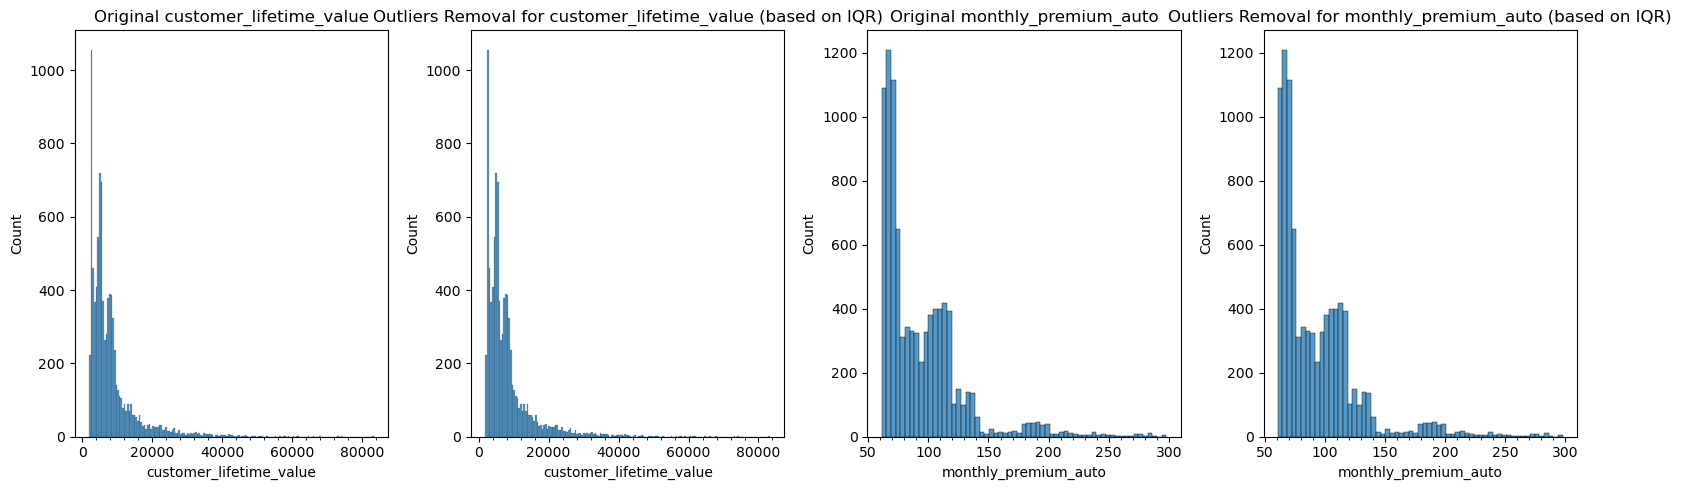

In [100]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(1, len(skewed_columns) * 2, figsize=(16, 5))
ax = ax.ravel()

for i, column in enumerate(skewed_columns):
    # Plot histograms for the original and cleaned data
    sns.histplot(data=continuous_df, x=column, ax=ax[i * 2])
    ax[i * 2].set_title(f"Original {column}")
    ax[i * 2].xaxis.set_minor_locator(AutoMinorLocator(5))

    # Create a copy of the data without outliers based on IQR
    no_outliers_iqr = continuous_df.copy()

    # Check if the column has outliers and remove them
    if column in outliers_iqr:
        outliers_indices = outliers_iqr[column]
        no_outliers_iqr = no_outliers_iqr.drop(outliers_indices, axis=0)

    sns.histplot(data=no_outliers_iqr, x=column, ax=ax[i * 2 + 1])
    ax[i * 2 + 1].set_title(f"Outliers Removal for {column} (based on IQR)")
    ax[i * 2 + 1].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.tight_layout()
plt.show()
